# DeepTools tutorial

## Common NGS data formats and tools

## Objectives

You should be familiar with the following common examples that we use daily:

1. Sequence retrieval
2. Read alignment
3. SAM/BAM query: index, sort, stats, visualization, filter, subset
4. SAM format, SAM flags
5. BED: sort, intersect (remove), merge
6. bw: plot aggregated signal, sample correlation

## Data formats

* fasta
* fastq
* bam / bam.bai / sam
* bed / bed4 / bed6 / bed6+4 == narrowPeak / bed12
* wiggle / bedgraph / bigwiggle
* vcf
* gtf / gff / gff3
* tsv / csv
* .py / .R / .sh / .jar / .pl
* Please refer to [the UCSC format FAQ](https://genome.ucsc.edu/FAQ/FAQformat.html) for "official" definition

## Tools

- fastqc / fastp
- seqtk
- BWA / bowtie2 / STAR
- samtools 
- bedtools
- deeptools
- scripting languange: Python




## wiggle, bigwiggle or bedgraph format

- These file formats store signal values for each base, or a fixed/variable region.
- The simplest format will be bedgraph file, this is a 4-column tsv file and the columns are: chr, start, end, value
- bigwiggle is just a binary format (compressed file) for bedgraph or wiggle.
- Wiggle format is little big complicated,see https://genome.ucsc.edu/goldenPath/help/wiggle.html.
- These 3 formats are inter-convertable.

## Get Started

In [3]:
!deeptools --version

deeptools 3.5.1


### Sample Correlation based on bam

The index file (.bai) for each bam file is required!

#### Step 1. Create count matrix

In [6]:
!/usr/bin/time -v multiBamSummary bins -b bam_data/*bam -o result.npz -bs 50000 -r chr21 -p 2


Number of bins found: 962
	Command being timed: "multiBamSummary bins -b bam_data/SRR2920466_hematopoietic_stem_cell.chr21.bam bam_data/SRR2920467_multipotent_progenitor_cell.chr21.bam bam_data/SRR2920468_lymphoid-primed_multipotent_progenitor_cell.chr21.bam bam_data/SRR2920469_common_myeloid_progenitor_cell.chr21.bam bam_data/SRR2920470_common_myeloid_progenitor_cell.chr21.bam bam_data/SRR2920471_granulocyte_macrophage_progenitor_cell.chr21.bam bam_data/SRR2920472_granulocyte_macrophage_progenitor_cell.chr21.bam bam_data/SRR2920473_megakaryocyte_erythroid_progenitor_cell.chr21.bam bam_data/SRR2920474_megakaryocyte_erythroid_progenitor_cell.chr21.bam bam_data/SRR2920475_CD14+_monocyte_cell.chr21.bam bam_data/SRR2920476_CD14+_monocyte_cell.chr21.bam bam_data/SRR2920477_hematopoietic_stem_cell.chr21.bam bam_data/SRR2920478_hematopoietic_stem_cell.chr21.bam bam_data/SRR2920479_multipotent_progenitor_cell.chr21.bam bam_data/SRR2920480_lymphoid-primed_multipotent_progenitor_cell.chr21.bam b

#### Step 2. Make some plots based on the count matrix

#### A pairwise scatter plot

In [110]:
# pairwise scatter plot for 50+ samples is very slow to plot
# !plotCorrelation -in result.npz -p scatterplot \
# --corMethod pearson --skipZeros \
# -o multiBamSummary.plotProfile.Pearson.skip_zero.png \
# --outFileCorMatrix test.tab

In [14]:
!multiBamSummary bins -b bam_data/*megakaryocyte_erythroid_progenitor_cell*bam -o MEP.npz -bs 50000 -r chr21 -p 2

Number of bins found: 962


In [15]:
!plotCorrelation -in MEP.npz -p scatterplot \
--corMethod pearson --skipZeros \
-o MEP.multiBamSummary.plotProfile.Pearson.skip_zero.png \
--outFileCorMatrix test.tab

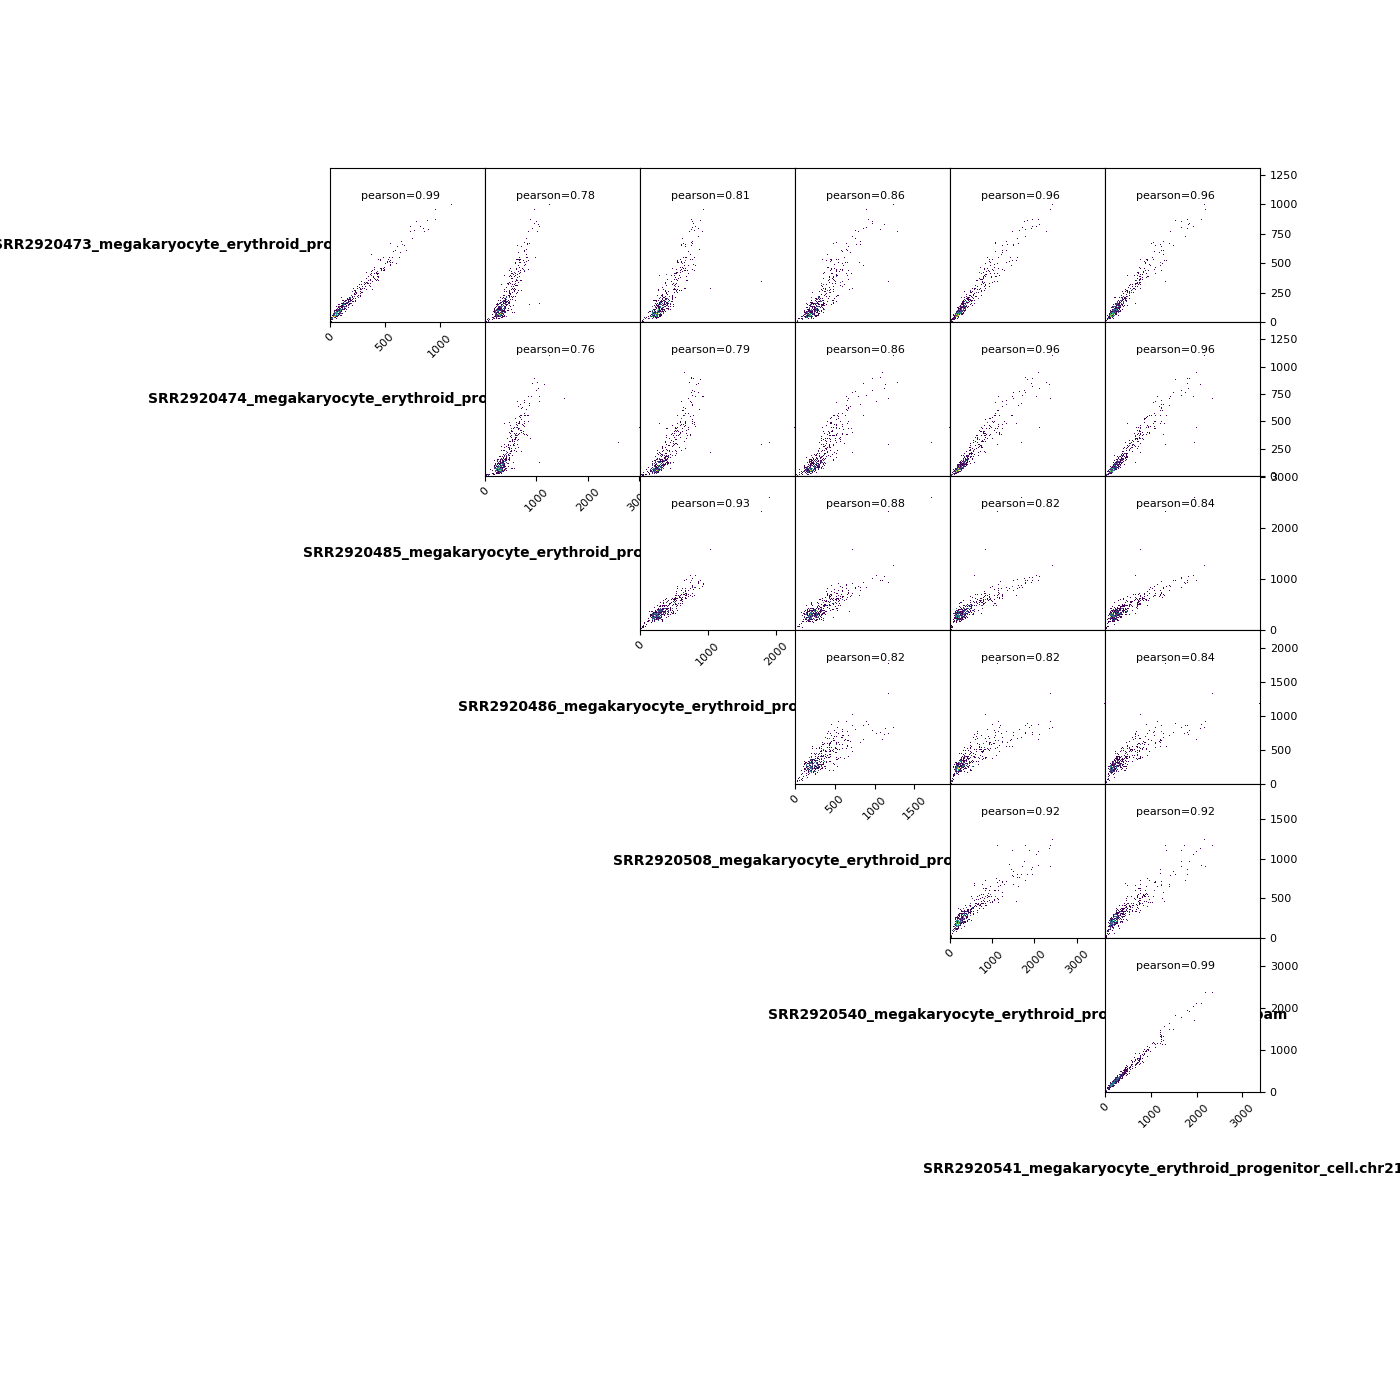

In [16]:
from IPython.display import Image
Image("MEP.multiBamSummary.plotProfile.Pearson.skip_zero.png")

#### A heatmap plot

In [12]:
!plotCorrelation -in result.npz -p heatmap \
--corMethod pearson --skipZeros \
-o multiBamSummary.plotProfile.Pearson.skip_zero.png \
--outFileCorMatrix test.tab

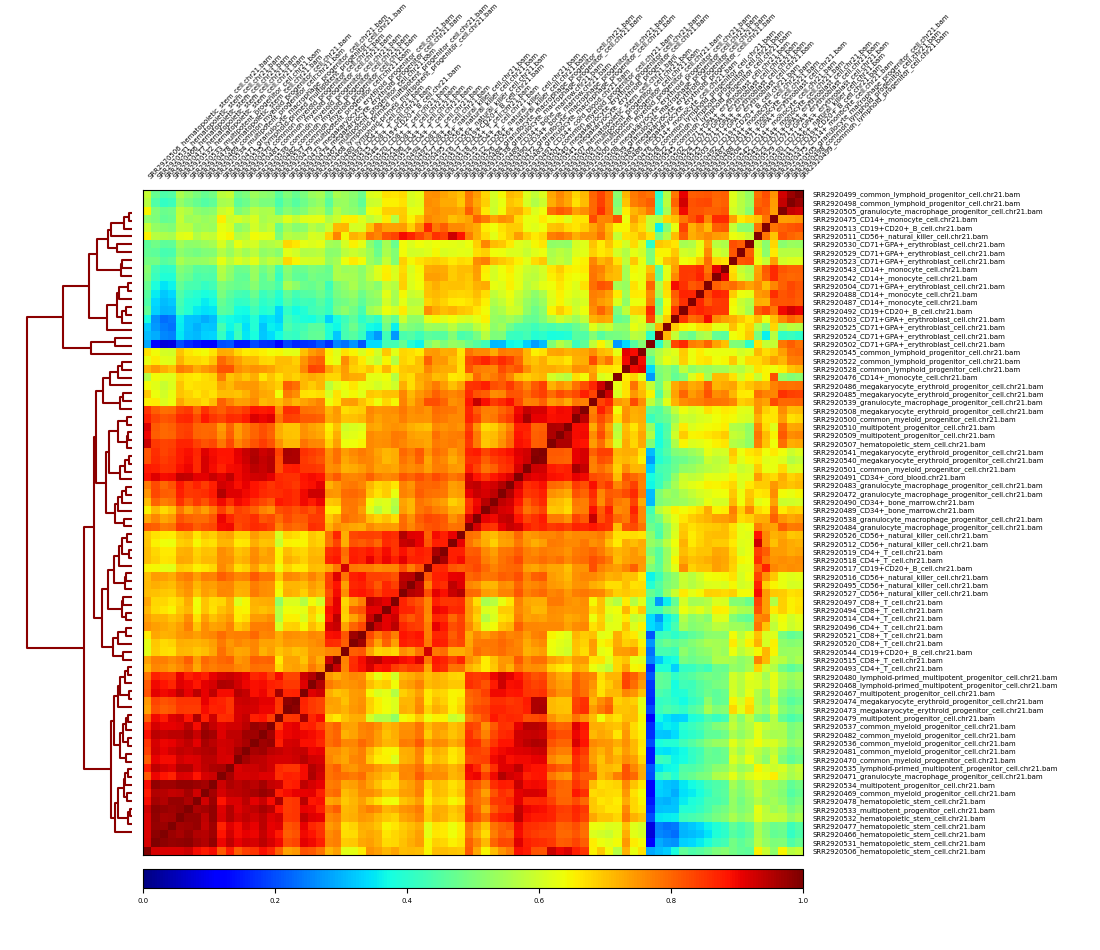

In [13]:
from IPython.display import Image
Image("multiBamSummary.plotProfile.Pearson.skip_zero.png")

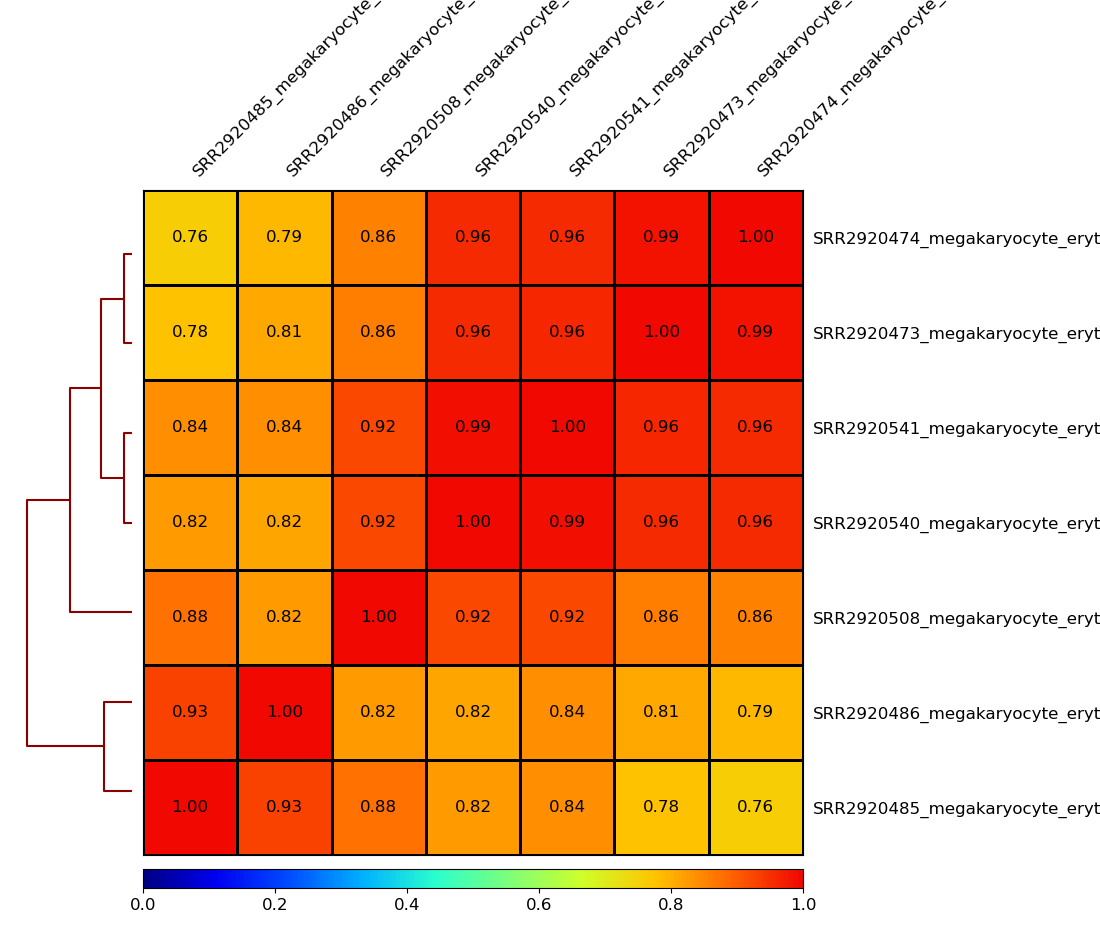

In [19]:
!plotCorrelation -in MEP.npz -p heatmap \
--corMethod pearson --skipZeros \
--plotNumbers \
-o MEP.multiBamSummary.plotProfile.Pearson.skip_zero.png \
--outFileCorMatrix test.tab
Image("MEP.multiBamSummary.plotProfile.Pearson.skip_zero.png")

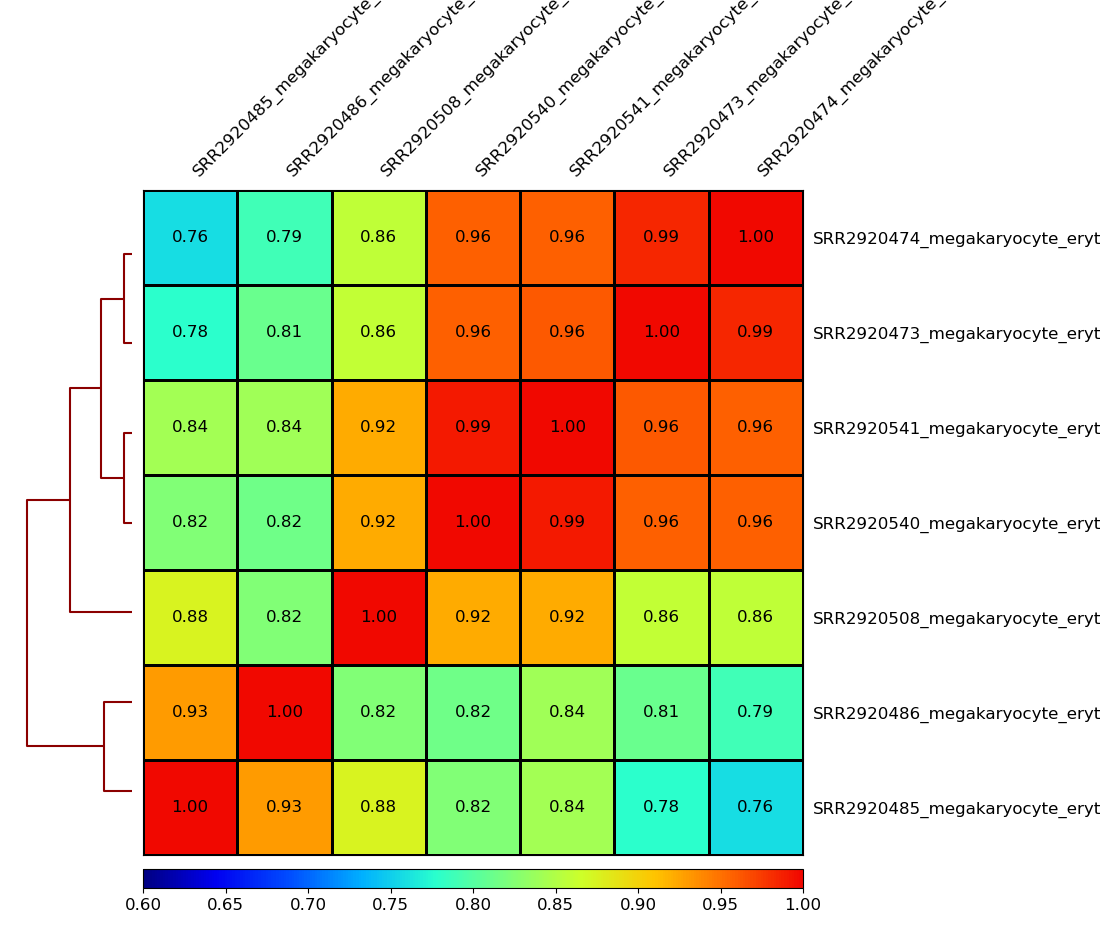

In [21]:
!plotCorrelation -in MEP.npz -p heatmap \
--corMethod pearson --skipZeros \
--plotNumbers -min 0.6 -max 1 \
-o MEP.multiBamSummary.plotProfile.Pearson.skip_zero.png \
--outFileCorMatrix test.tab
Image("MEP.multiBamSummary.plotProfile.Pearson.skip_zero.png")

You can use `--plotFileFormat` to create pdf or svg files

#### PCA plot

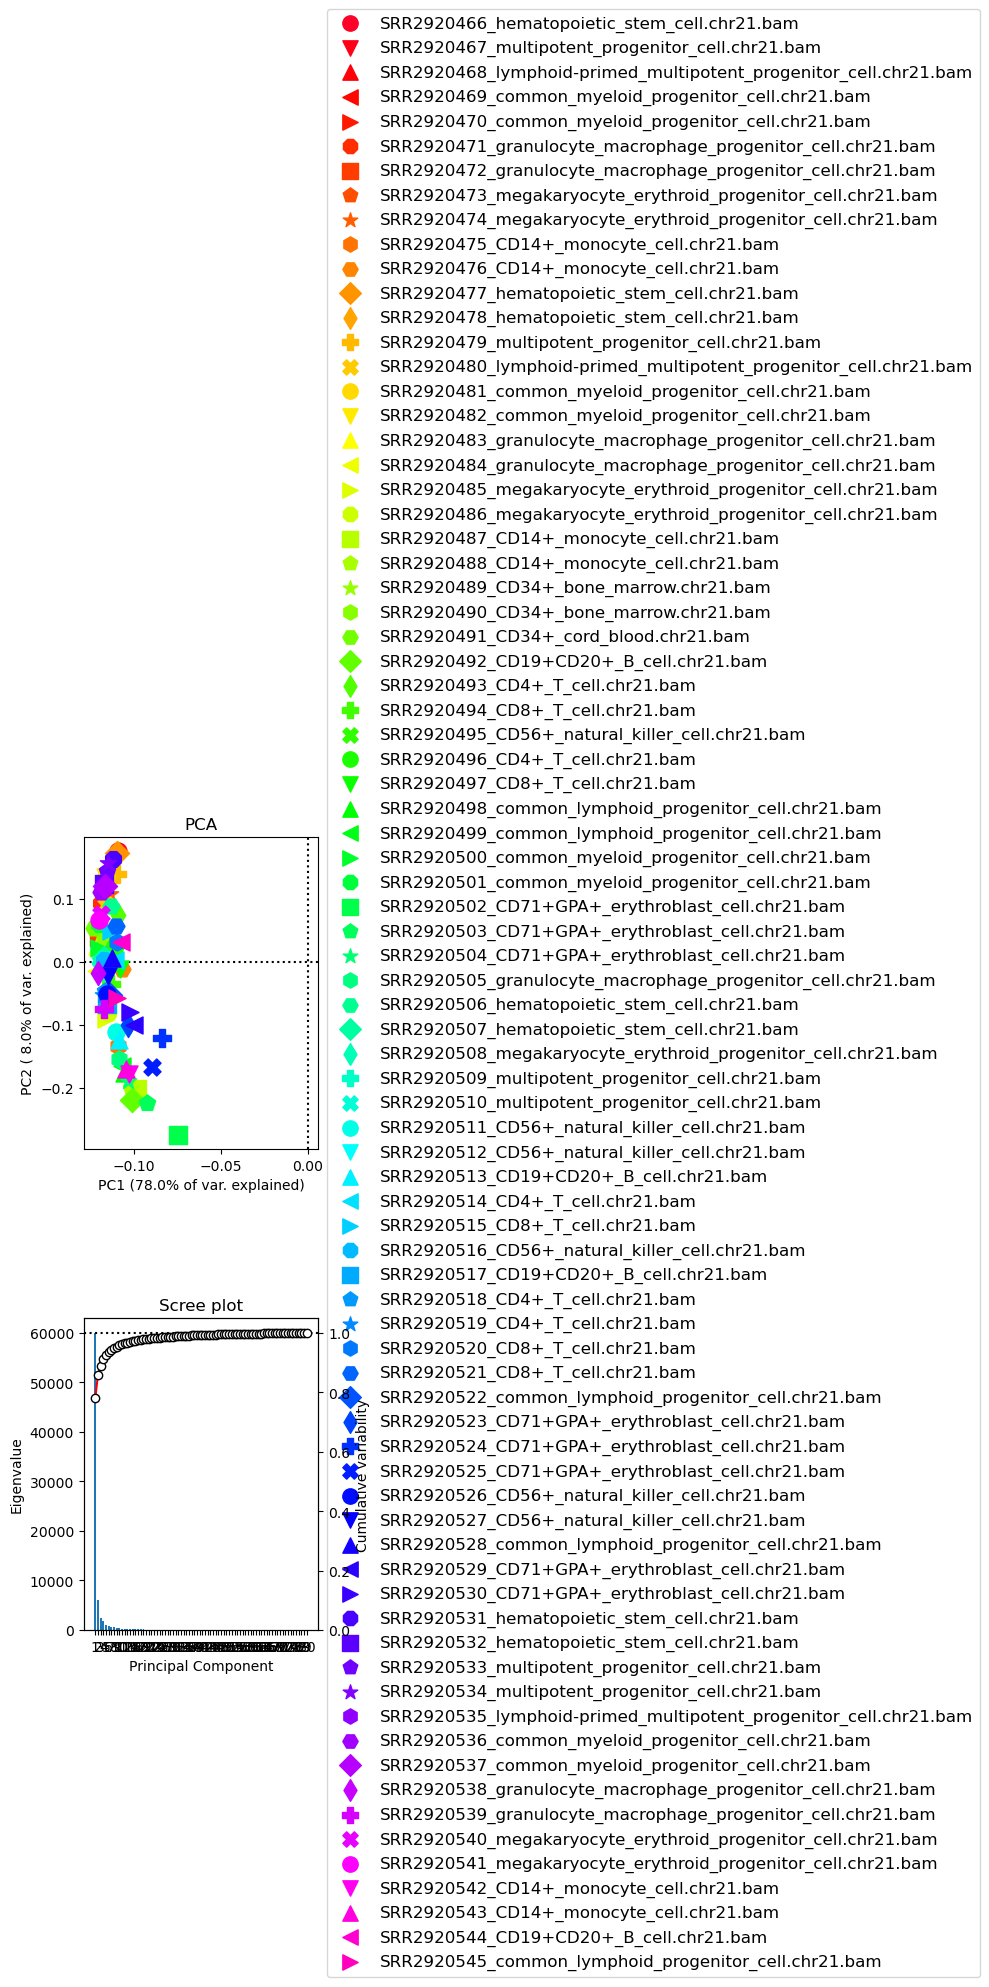

In [22]:
!plotPCA -in result.npz \
-o PCA_readCounts.png 
Image("PCA_readCounts.png")

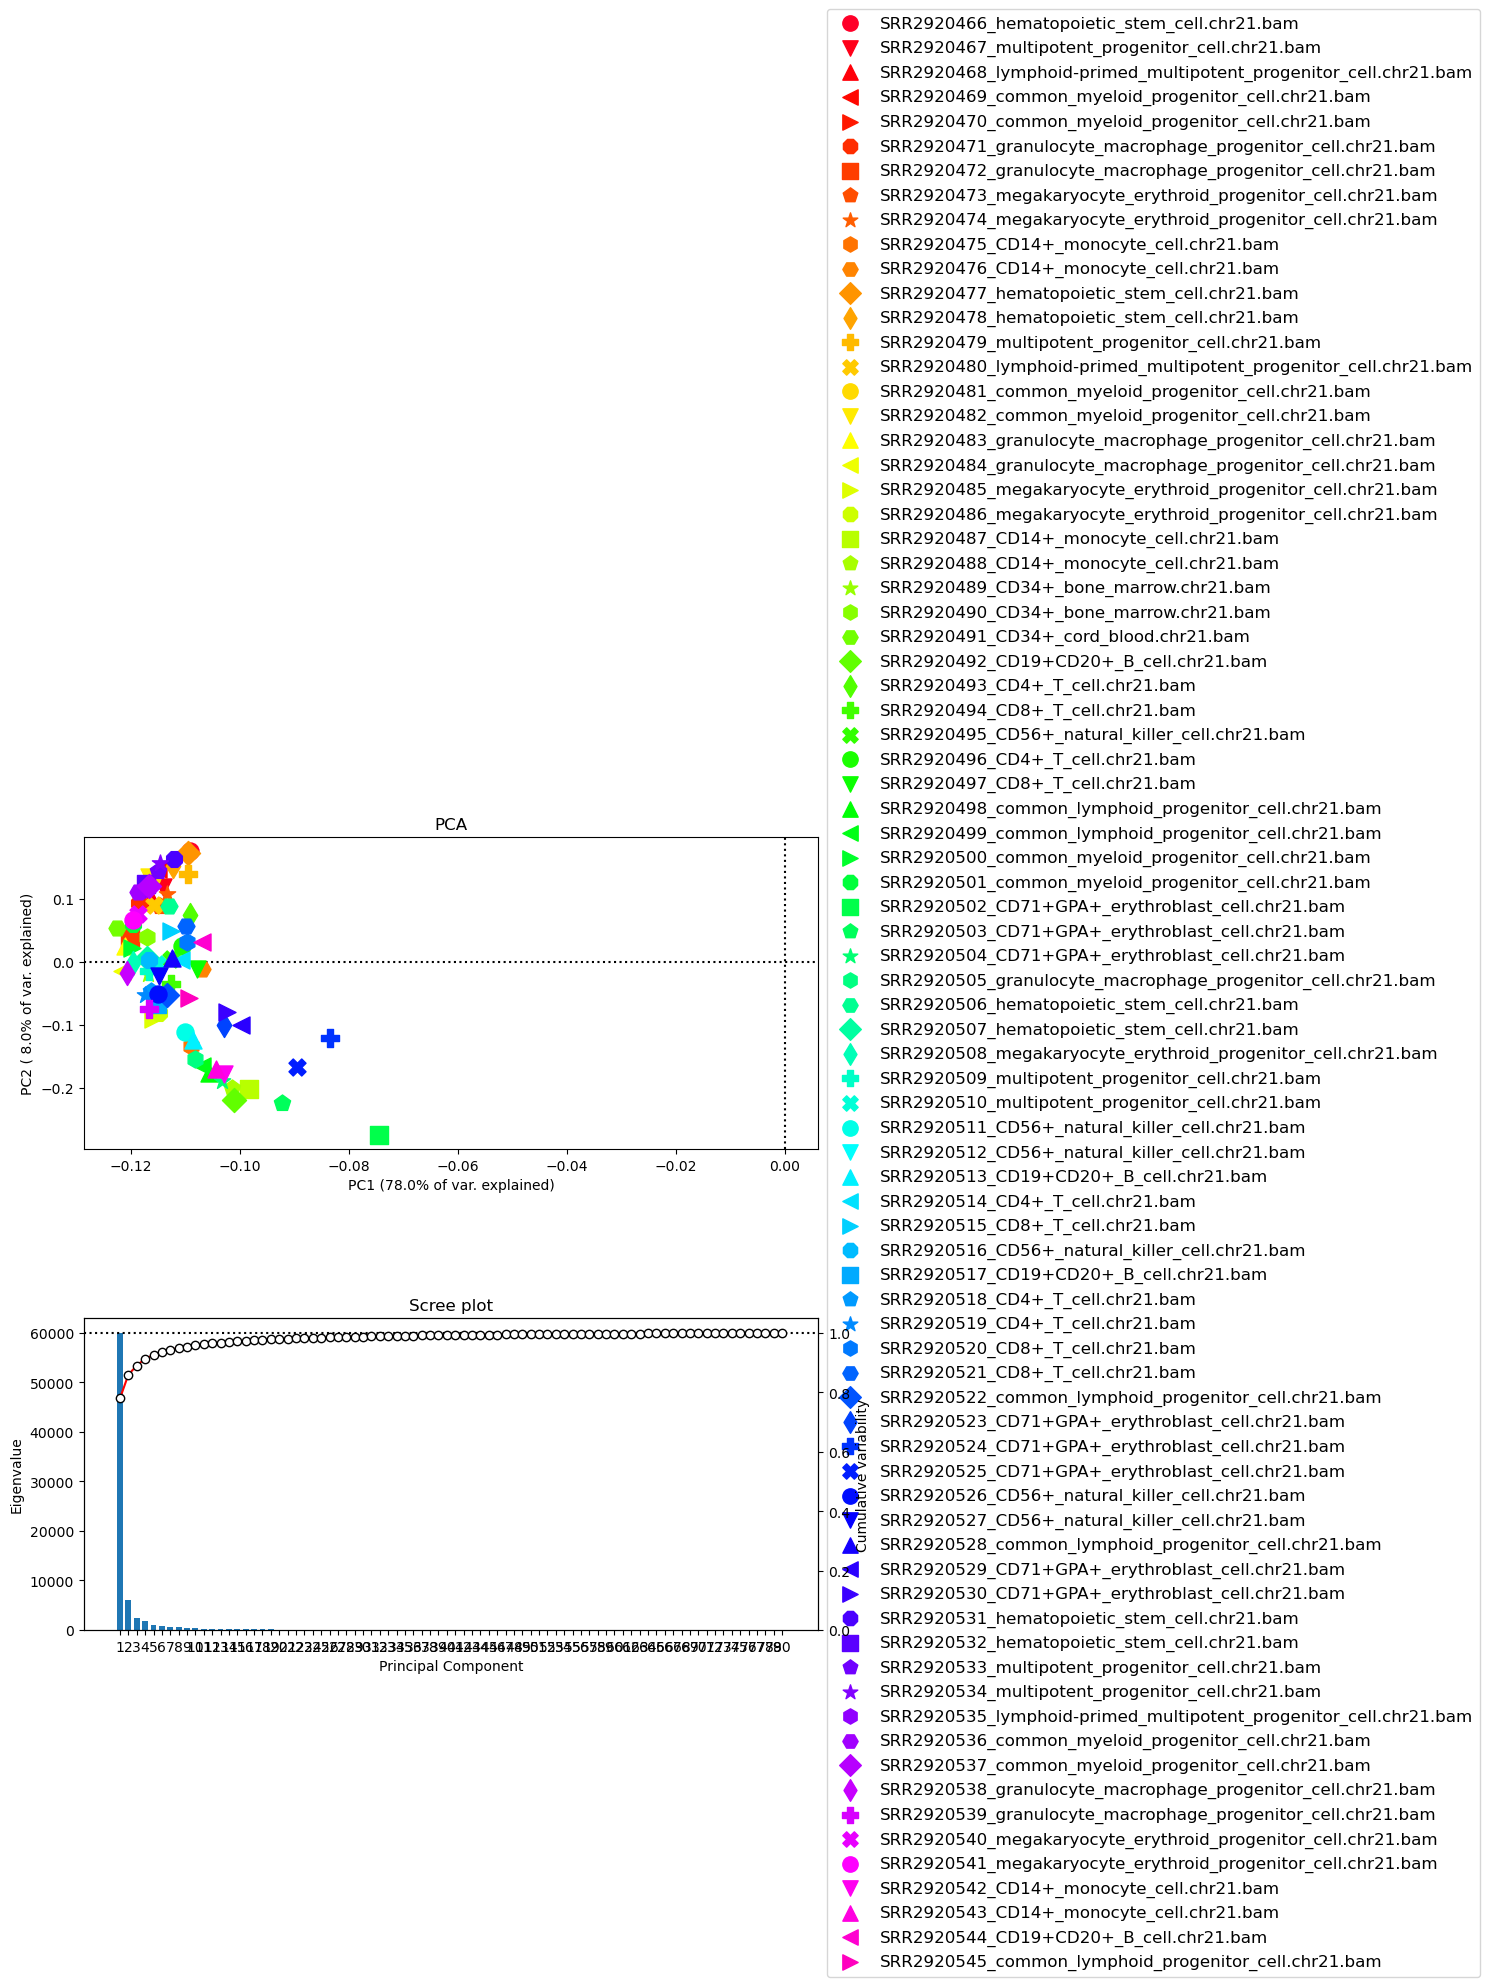

In [42]:
!plotPCA -in result.npz \
-o PCA_readCounts.png \
--plotWidth 15
Image("PCA_readCounts.png")

### Distribution of fragment size



BAM file : bam_data/SRR2920489_CD34+_bone_marrow.chr21.bam
Sample size: 1141

Fragment lengths:
Min.: 0.0
1st Qu.: 56.0
Mean: 129.88869412795793
Median: 97.0
3rd Qu.: 192.0
Max.: 570.0
Std: 95.95941509994078
MAD: 53.0
Len. 10%: 40.0
Len. 20%: 51.0
Len. 30%: 63.0
Len. 40%: 79.0
Len. 60%: 128.0
Len. 70%: 175.0
Len. 80%: 206.0
Len. 90%: 251.0
Len. 99%: 440.7999999999997


Read lengths:
Sample size: 1141

Min.: 30.0
1st Qu.: 64.0
Mean: 68.61174408413672
Median: 76.0
3rd Qu.: 76.0
Max.: 76.0
Std: 12.357620415026776
MAD: 0.0
Len. 10%: 46.0
Len. 20%: 57.0
Len. 30%: 69.0
Len. 40%: 76.0
Len. 60%: 76.0
Len. 70%: 76.0
Len. 80%: 76.0
Len. 90%: 76.0
Len. 99%: 76.0



BAM file : bam_data/SRR2920490_CD34+_bone_marrow.chr21.bam
Sample size: 1376

Fragment lengths:
Min.: 0.0
1st Qu.: 62.0
Mean: 138.97238372093022
Median: 108.0
3rd Qu.: 202.0
Max.: 870.0
Std: 99.21099692957296
MAD: 57.5
Len. 10%: 44.0
Len. 20%: 57.0
Len. 30%: 69.5
Len. 40%: 85.0
Len. 60%: 144.0
Len. 70%: 183.4999999999999
Len. 80%: 21

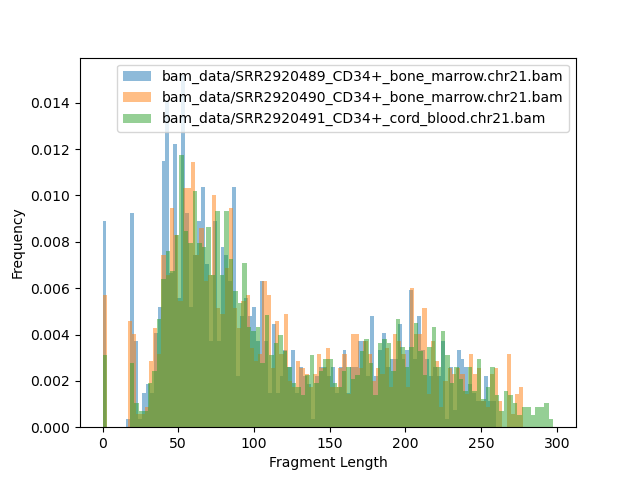

In [71]:
!bamPEFragmentSize -o fragment.png -b bam_data/*CD34*bam -p 20 \
-bs 10 \
-bl hg19_main.chrom_sizes.bed
Image("fragment.png")



BAM file : /home/yli11/dirs/blood_regulome/chenggrp/Projects/bone_marrow_ATAC_seq/data/PRJNA301969_HemTools/atac_seq_yli11_2019-04-11/bam_files/SRR2920531_hematopoietic_stem_cell.rmdup.uq.bam
Sample size: 169260

Fragment lengths:
Min.: 0.0
1st Qu.: 72.0
Mean: 1053.2384910788137
Median: 177.0
3rd Qu.: 273.0
Max.: 144448594.0
Std: 351102.81160631403
MAD: 103.0
Len. 10%: 44.0
Len. 20%: 62.0
Len. 30%: 84.0
Len. 40%: 122.0
Len. 60%: 211.0
Len. 70%: 245.0
Len. 80%: 322.0
Len. 90%: 418.0
Len. 99%: 650.0


Read lengths:
Sample size: 169260

Min.: 21.0
1st Qu.: 76.0
Mean: 70.51103036748198
Median: 76.0
3rd Qu.: 76.0
Max.: 76.0
Std: 11.105600025298877
MAD: 0.0
Len. 10%: 50.0
Len. 20%: 66.0
Len. 30%: 76.0
Len. 40%: 76.0
Len. 60%: 76.0
Len. 70%: 76.0
Len. 80%: 76.0
Len. 90%: 76.0
Len. 99%: 76.0



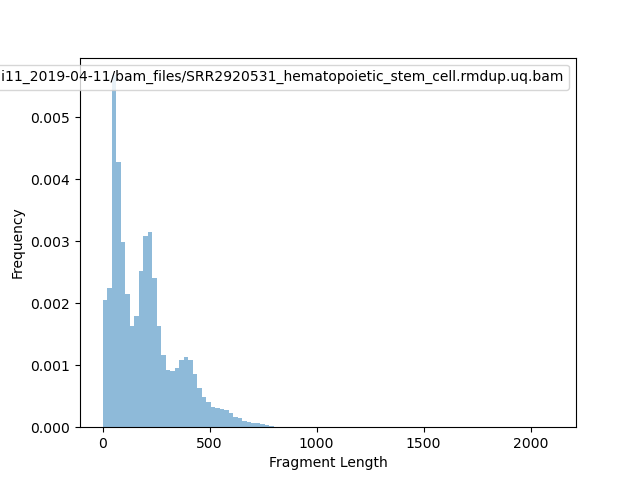

In [66]:
!bamPEFragmentSize -o fragment2.png \
-bs 10000 \
-b /home/yli11/dirs/blood_regulome/chenggrp/Projects/bone_marrow_ATAC_seq/data/PRJNA301969_HemTools/atac_seq_yli11_2019-04-11/bam_files/SRR2920531_hematopoietic_stem_cell.rmdup.uq.bam \
-p 20
Image("fragment2.png")


### Distribution of read coverage

In [56]:
!plotCoverage -b bam_data/*CD34*bam \
    -p 20 \
    -o coverage.png \
    --plotTitle "example_coverage" \
    --outRawCounts coverage.tab \
    -r chr21


sample	mean	std	min	25%	50%	75%	max
SRR2920489_CD34+_bone_marrow.chr21.bam	0.25	1.60	0	0.0	0.0	0.0	376	
SRR2920490_CD34+_bone_marrow.chr21.bam	0.30	2.09	0	0.0	0.0	0.0	334	
SRR2920491_CD34+_cord_blood.chr21.bam	0.49	3.27	0	0.0	0.0	0.0	425	


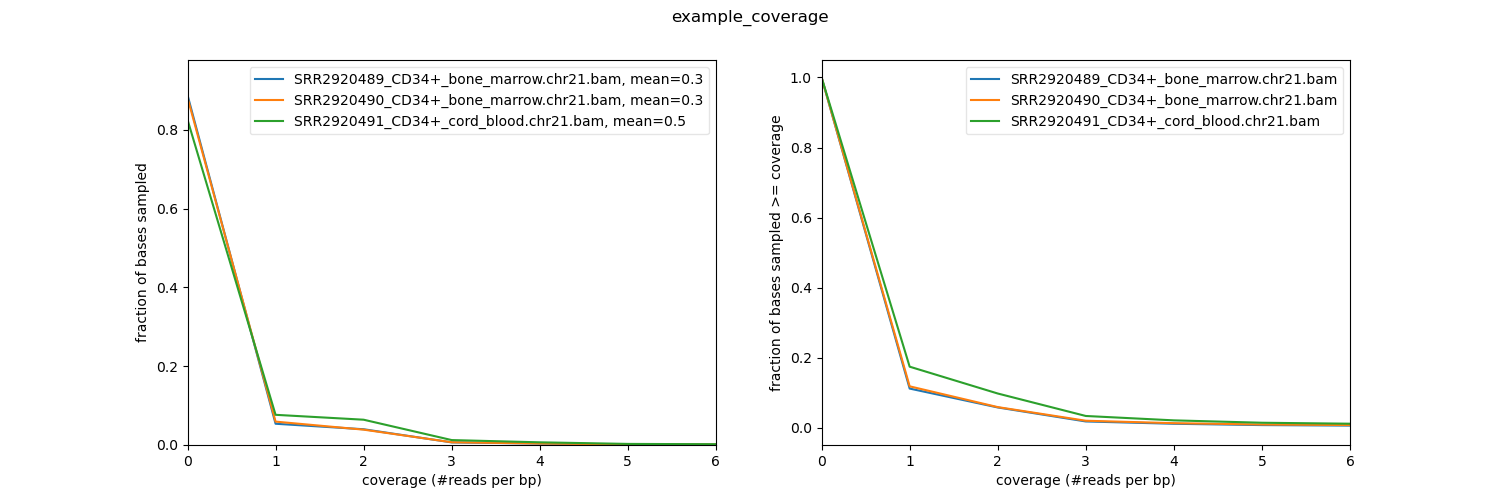

In [57]:
Image("coverage.png")

### Barplot: Comparing average signal on a region or some regions

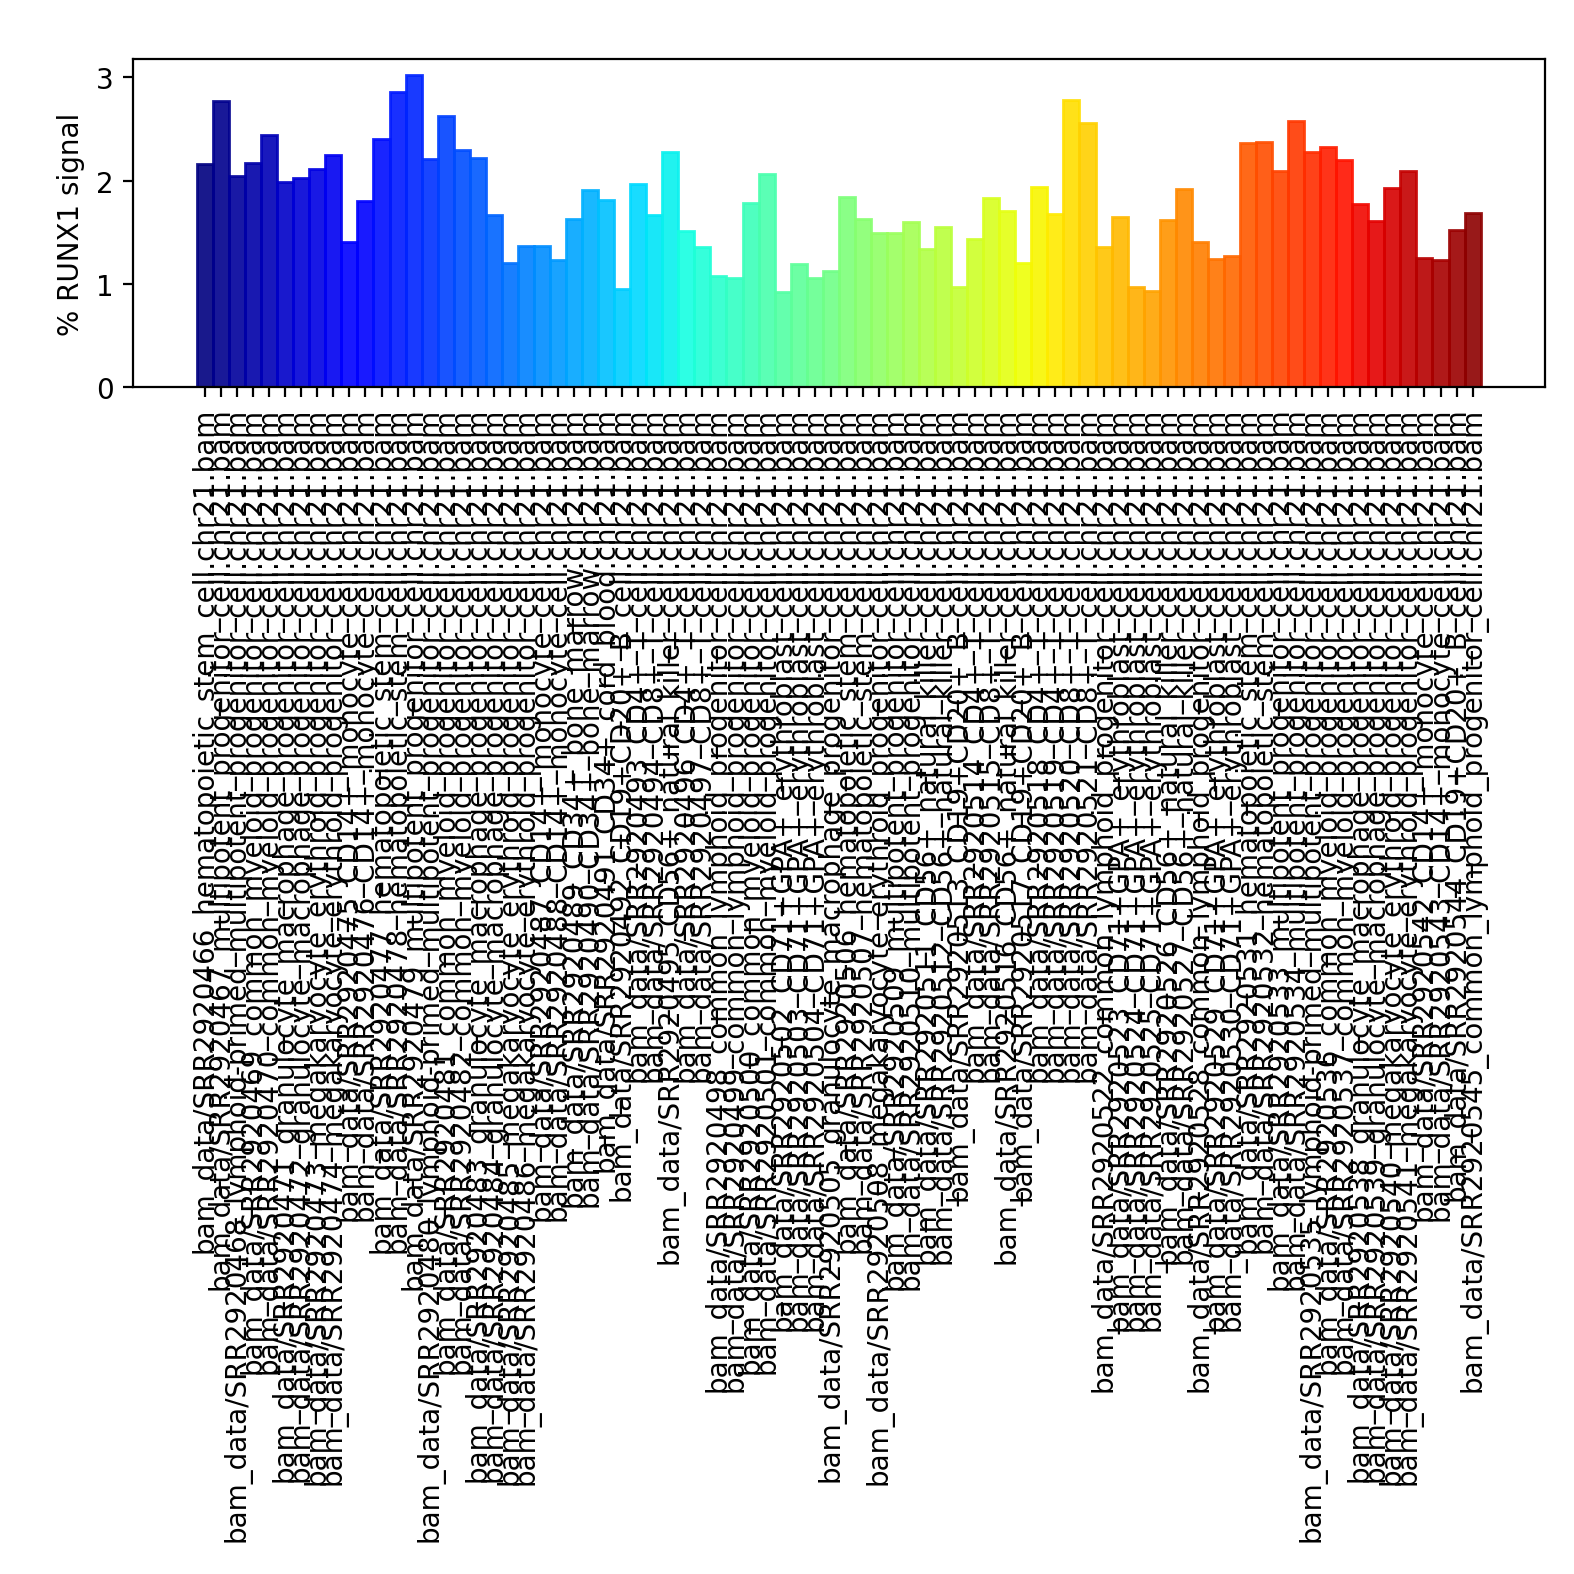

In [53]:
!plotEnrichment -b bam_data/*bam \
--BED runx1.bed \
--regionLabels "RUNX1 signal" \
-o enrichment.png \
-p 20 \
--variableScales \
--outRawCounts outRawCounts.tsv 
Image("enrichment.png")

### Convert bam to bw file

In [59]:
!bamCoverage --bam bam_data/SRR2920490_CD34+_bone_marrow.chr21.bam \
    -o CD34.bw \
    --binSize 50 \
    --ignoreForNormalization chrX \
    --extendReads \
    -p 10

bamFilesList: ['bam_data/SRR2920490_CD34+_bone_marrow.chr21.bam']
binLength: 50
numberOfSamples: None
blackListFileName: None
skipZeroOverZero: False
bed_and_bin: False
genomeChunkSize: None
defaultFragmentLength: 80
numberOfProcessors: 10
verbose: False
region: None
bedFile: None
minMappingQuality: None
ignoreDuplicates: False
chrsToSkip: ['chrX']
stepSize: 50
center_read: False
samFlag_include: None
samFlag_exclude: None
minFragmentLength: 0
maxFragmentLength: 0
zerosToNans: False
smoothLength: None
save_data: False
out_file_for_raw_data: None
maxPairedFragmentLength: 320


In [60]:
!bamCoverage --bam bam_data/SRR2920502_CD71+GPA+_erythroblast_cell.chr21.bam \
    -o CD71.bw \
    --binSize 50 \
    --ignoreForNormalization chrX \
    --extendReads \
    -p 10

bamFilesList: ['bam_data/SRR2920502_CD71+GPA+_erythroblast_cell.chr21.bam']
binLength: 50
numberOfSamples: None
blackListFileName: None
skipZeroOverZero: False
bed_and_bin: False
genomeChunkSize: None
defaultFragmentLength: 83
numberOfProcessors: 10
verbose: False
region: None
bedFile: None
minMappingQuality: None
ignoreDuplicates: False
chrsToSkip: ['chrX']
stepSize: 50
center_read: False
samFlag_include: None
samFlag_exclude: None
minFragmentLength: 0
maxFragmentLength: 0
zerosToNans: False
smoothLength: None
save_data: False
out_file_for_raw_data: None
maxPairedFragmentLength: 332


### aggregated signal plot

### Step 1. Compute count matrix
#### There are two modes:
1. centered at the input region(s)
2. bin and plot the entire input region(s)

In [74]:
!computeMatrix reference-point \
--referencePoint center \
-a 5000 -b 5000 \
-R chr21.peak \
-S CD34.bw \
--skipZeros \
-p 20 \
-o test.gz

### Step 2. Plot heatmap

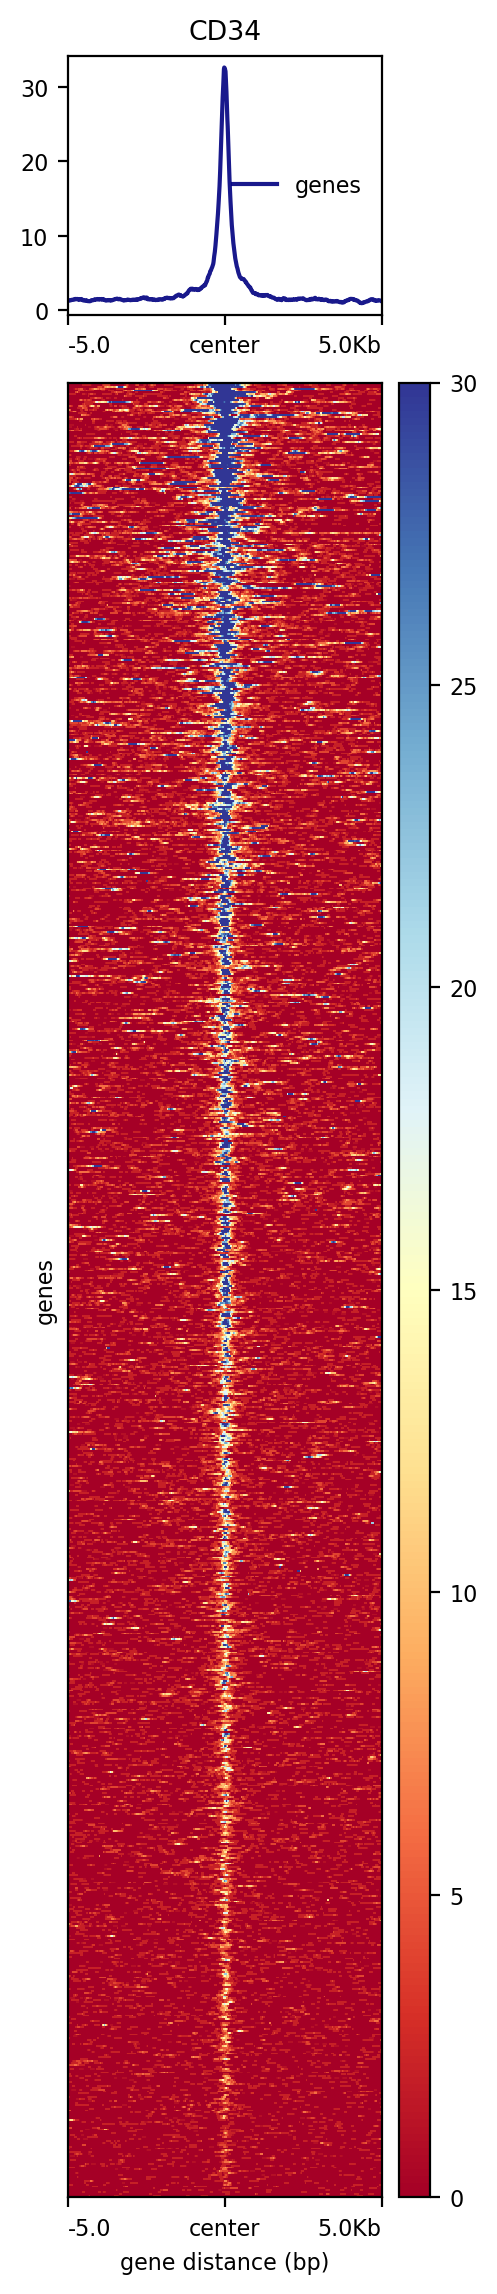

In [87]:
!plotHeatmap -m test.gz -out test.png
Image("test.png")

### More examples

In [88]:
!computeMatrix reference-point \
--referencePoint center \
-a 5000 -b 5000 \
-R chr21.peak \
-S CD34.bw CD71.bw\
--skipZeros \
-p 20 \
-o test.gz

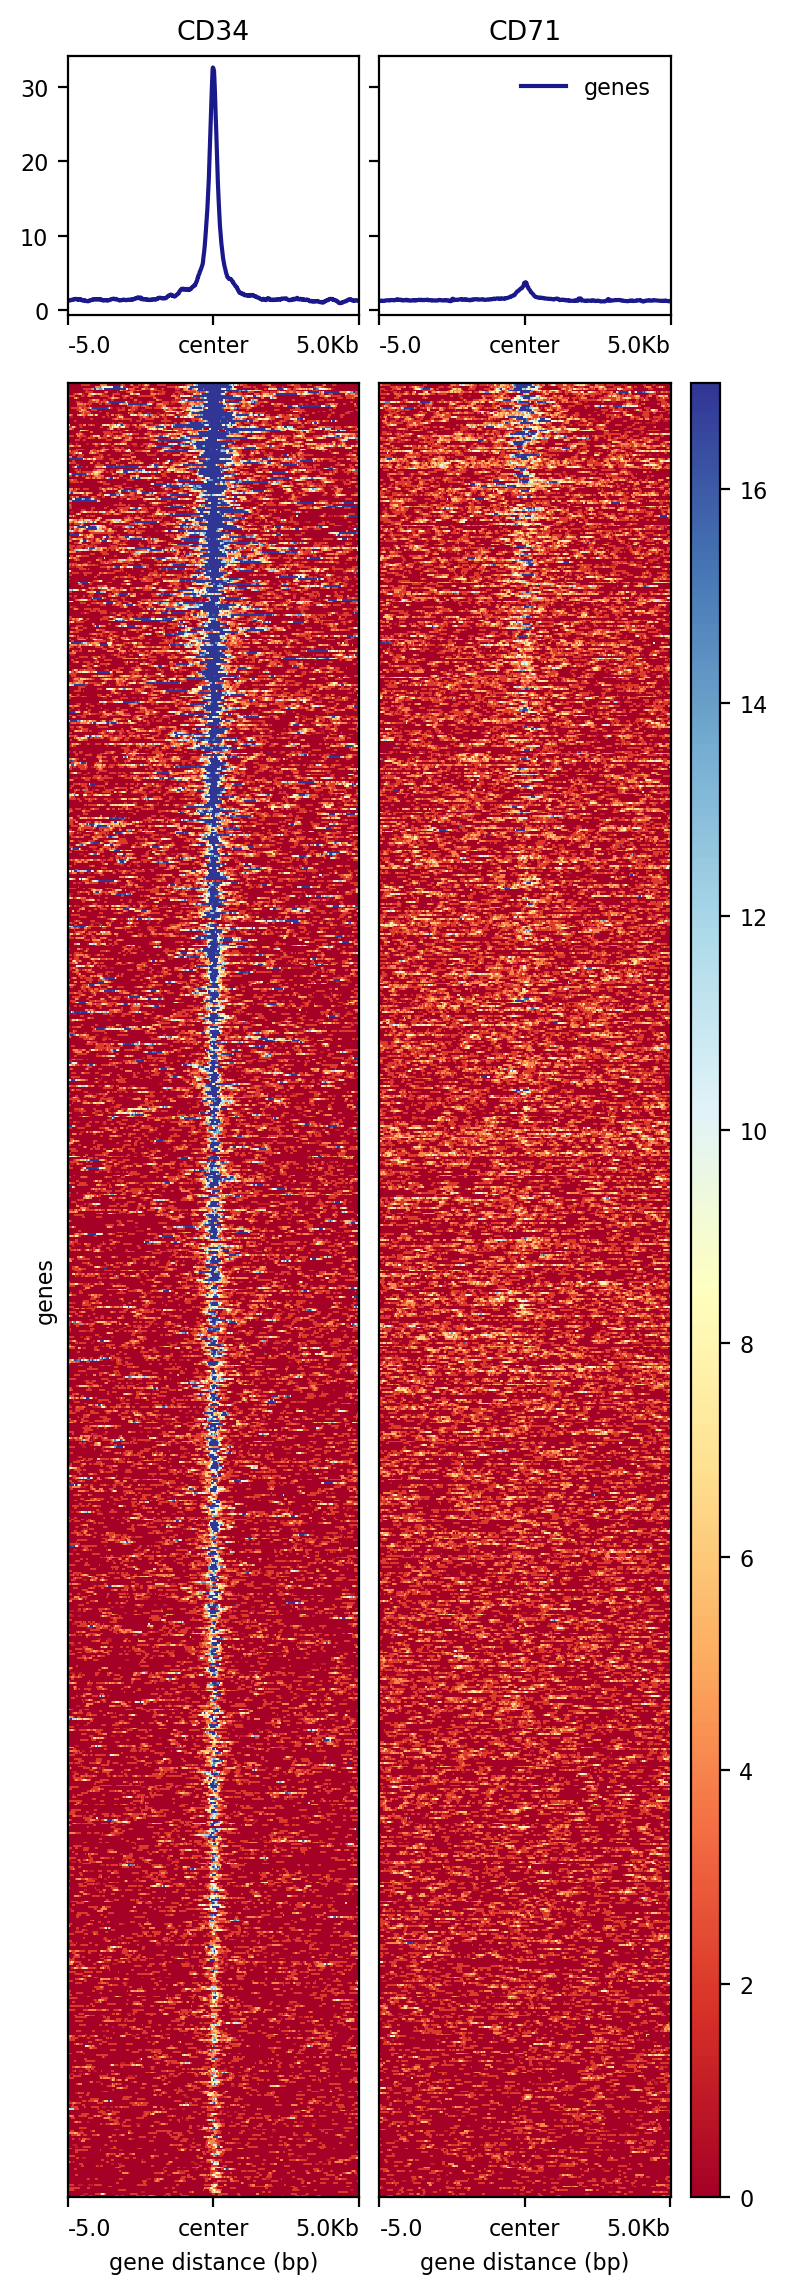

In [89]:
!plotHeatmap -m test.gz -out test.png
Image("test.png")

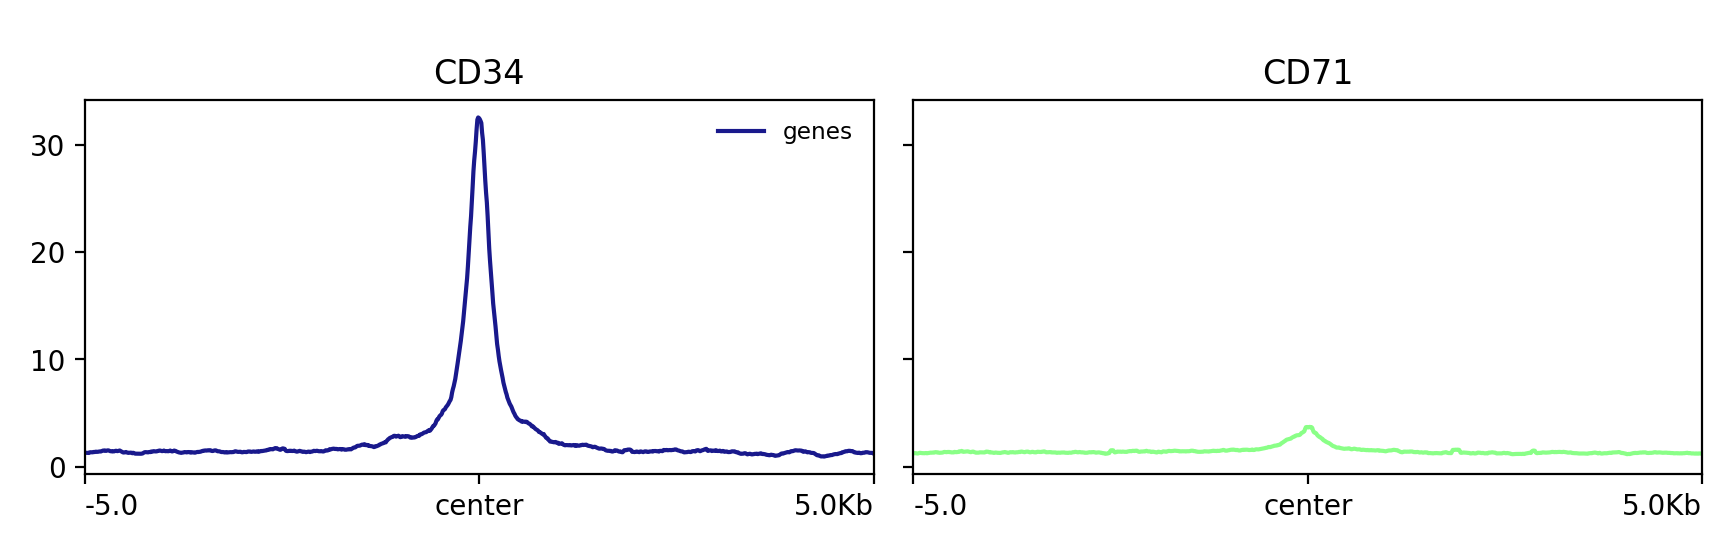

In [90]:
!plotProfile -m test.gz \
              -out test.png 
Image("test.png")

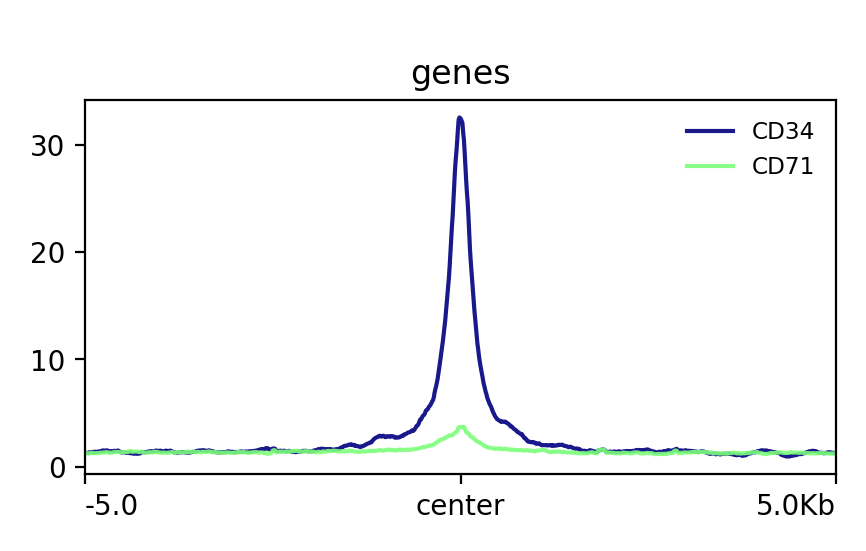

In [91]:
!plotProfile -m test.gz --perGroup \
              -out test.png 
Image("test.png")

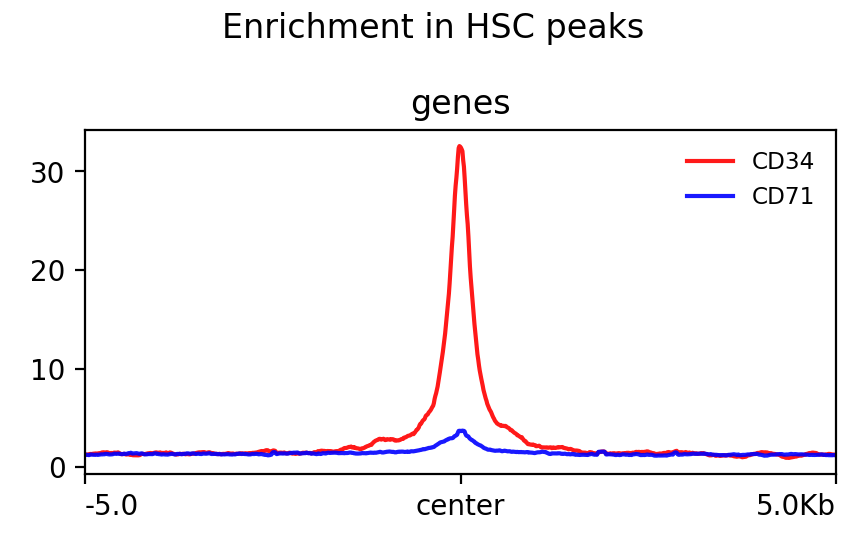

In [94]:
!plotProfile -m test.gz --perGroup \
            --colors red blue \
            --plotTitle "Enrichment in HSC peaks" \
              -out test.png 
Image("test.png")

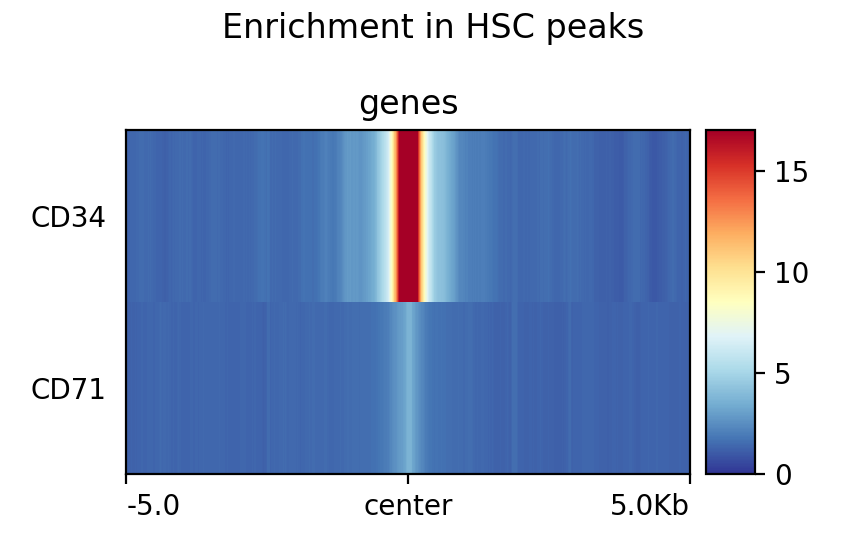

In [97]:
!plotProfile -m test.gz --perGroup \
            --plotType heatmap \
            --plotTitle "Enrichment in HSC peaks" \
              -out test.png 
Image("test.png")

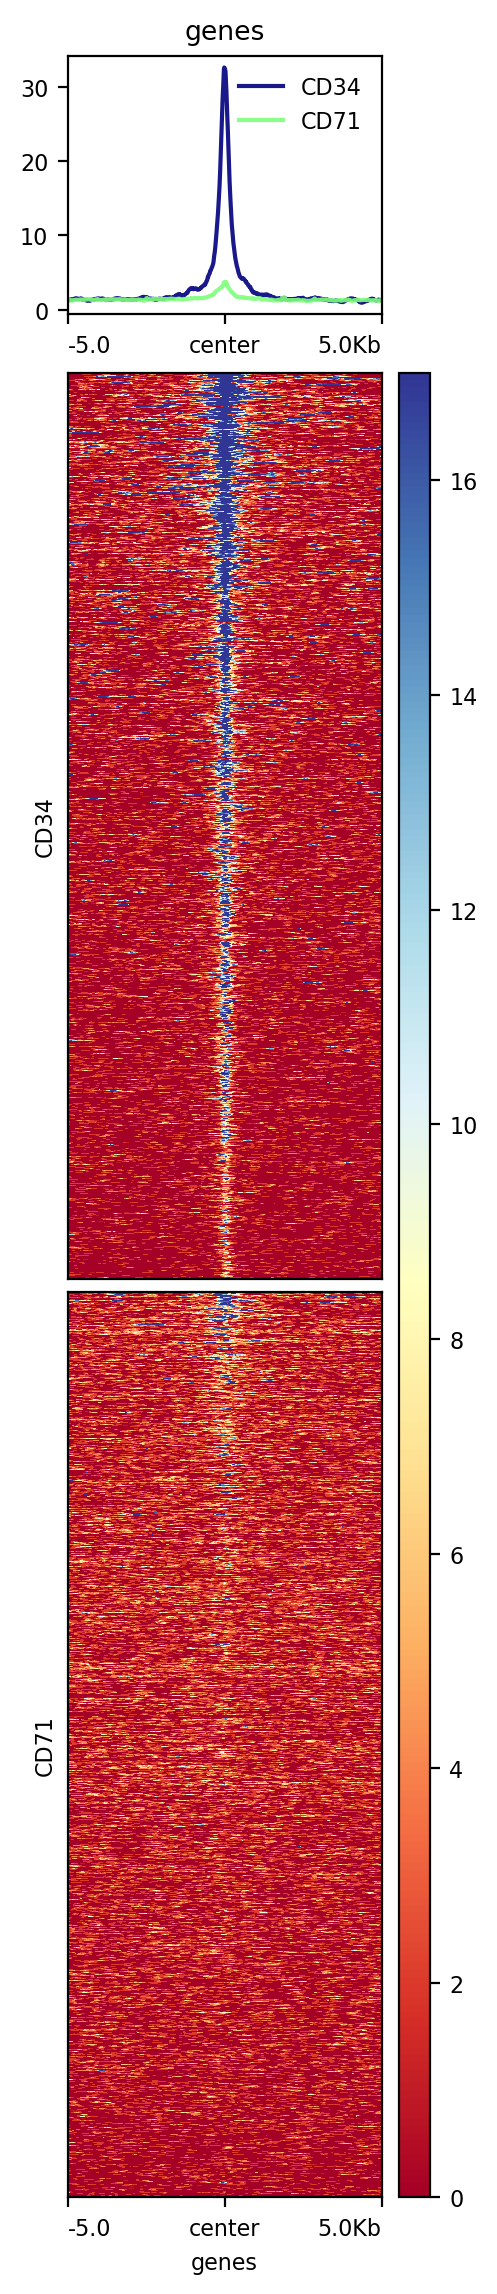

In [98]:
!plotHeatmap -m test.gz -out test.png --perGroup
Image("test.png")

### Default plot is per bed file, use `--perGroup` will make the plot per bw file

### 2 bw and 2 bed files

In [100]:
!computeMatrix reference-point \
--referencePoint center \
-a 5000 -b 5000 \
-R chr21.peak CD71.peak \
-S CD34.bw CD71.bw \
--skipZeros \
-p 20 \
-o test2.gz

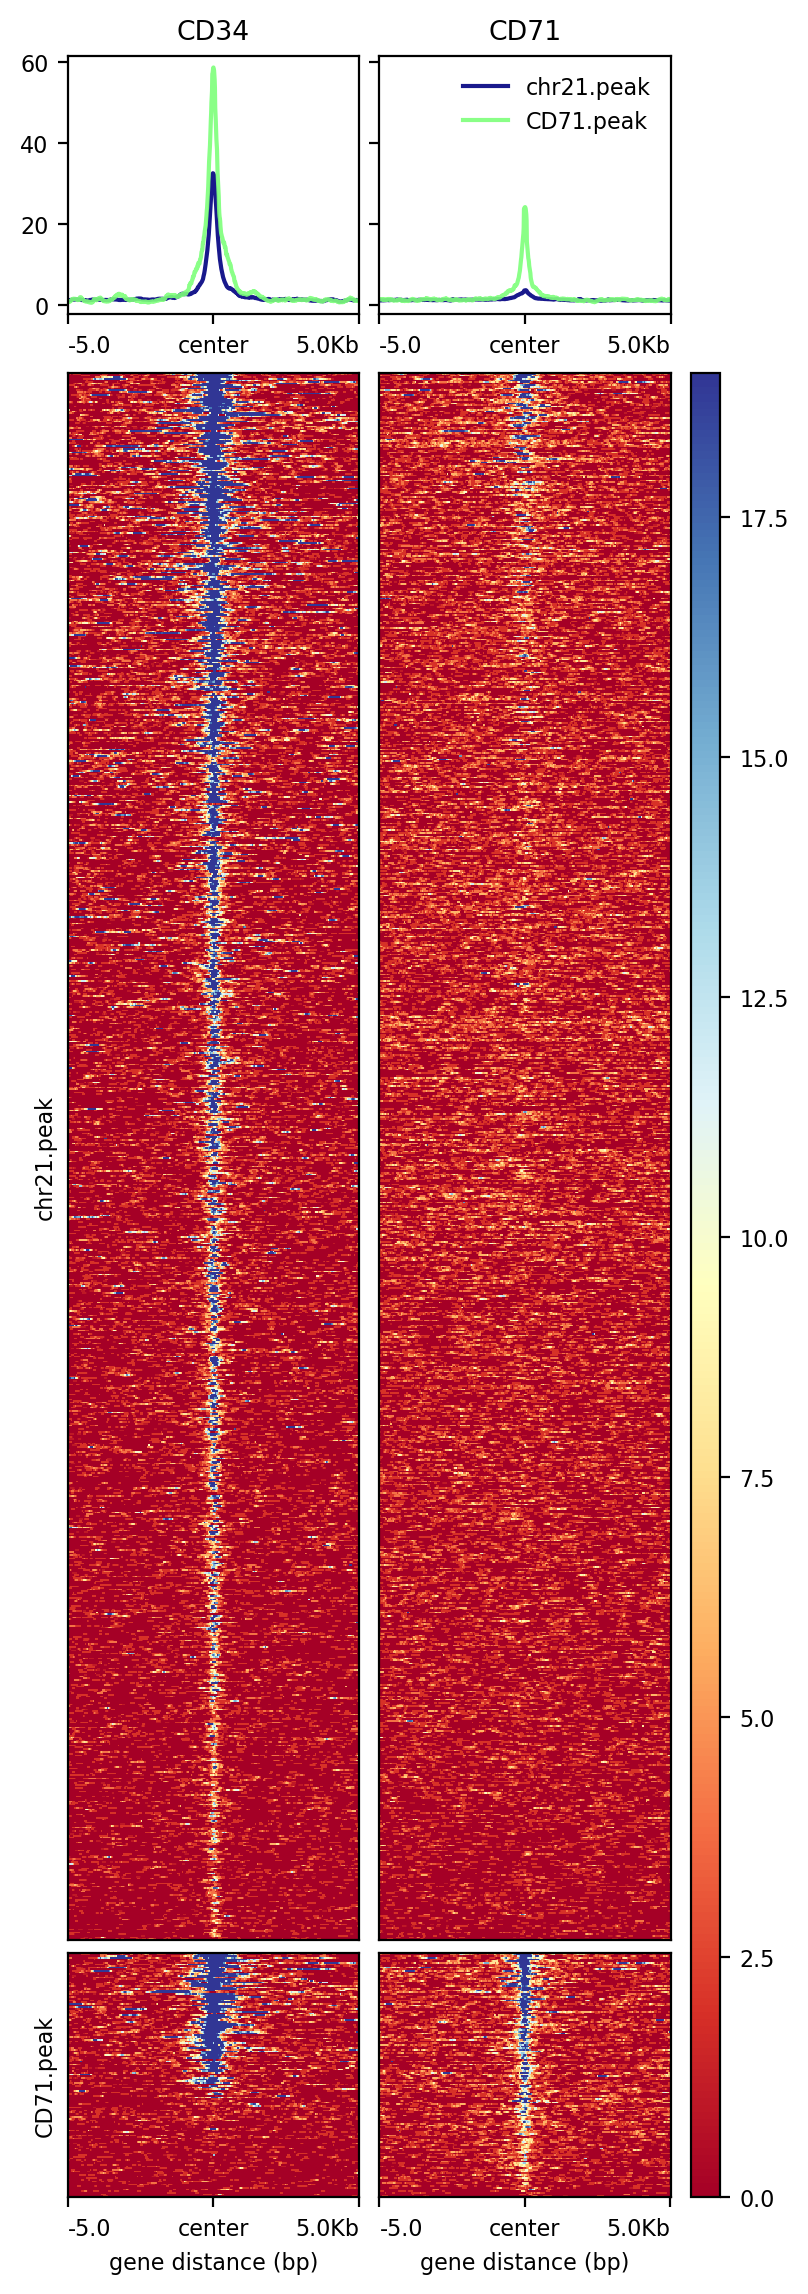

In [101]:
!plotHeatmap -m test2.gz -out test2.png
Image("test2.png")

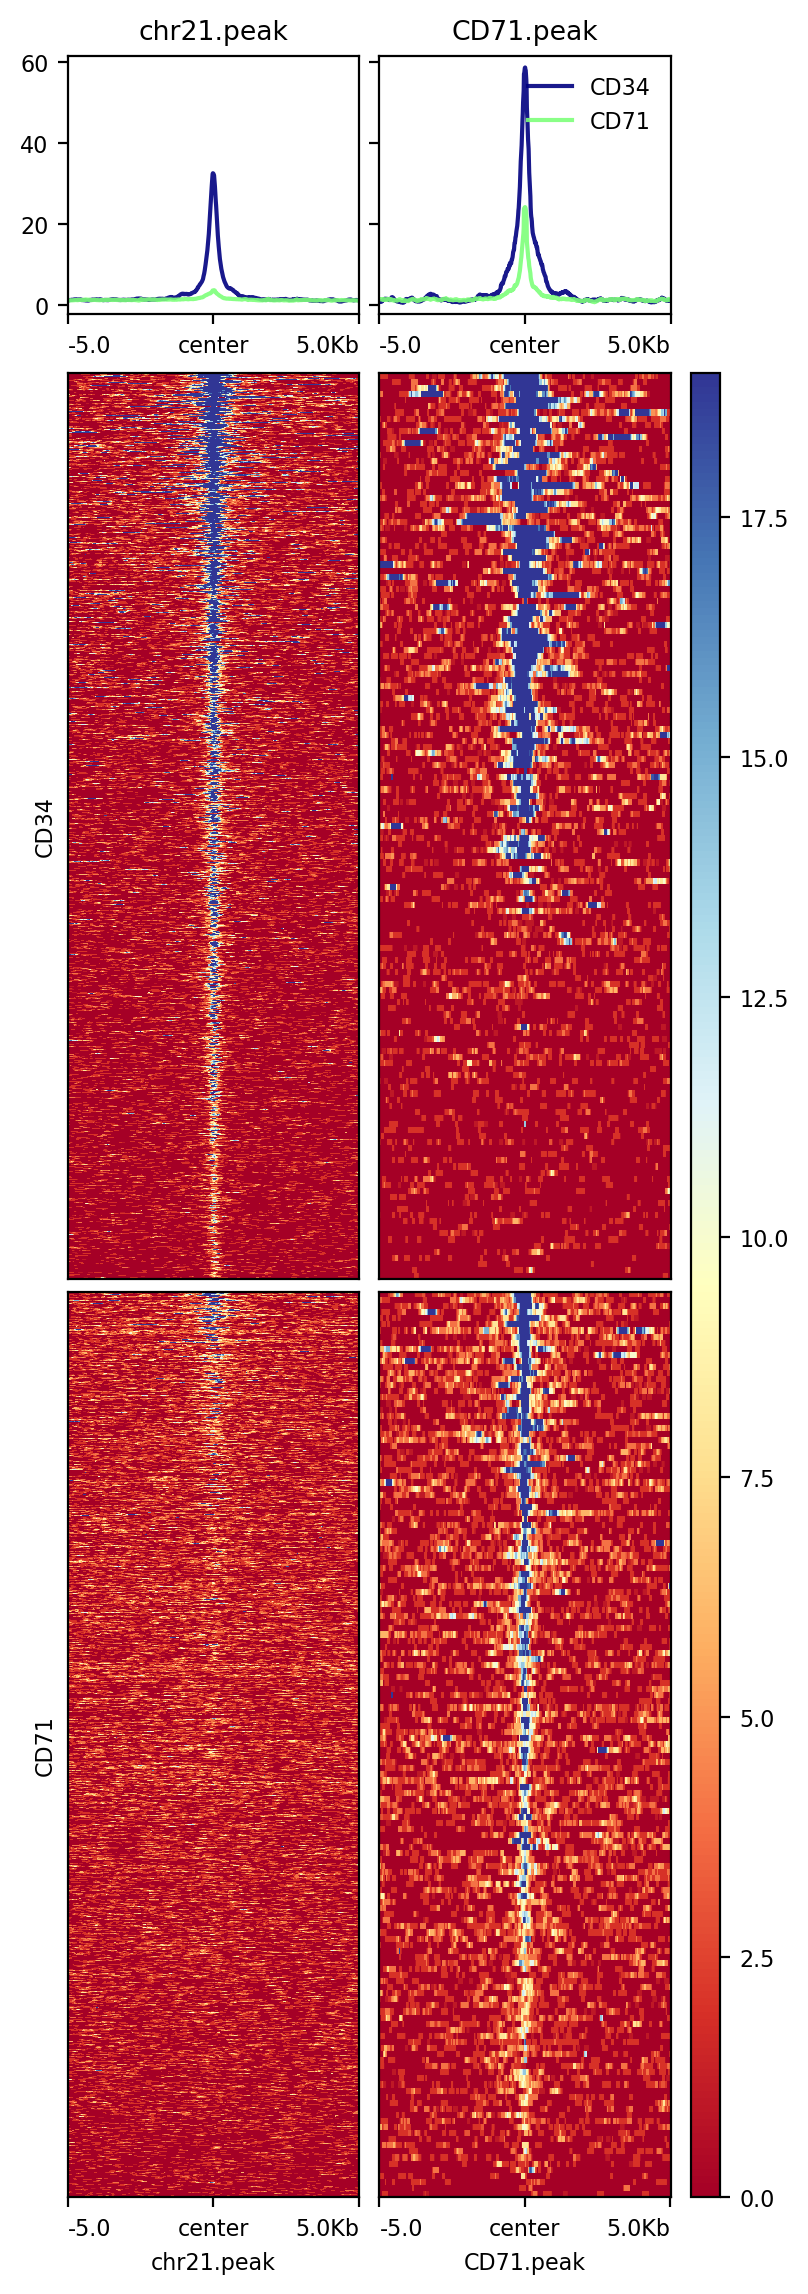

In [102]:
!plotHeatmap -m test2.gz -out test2.png --perGroup
Image("test2.png")

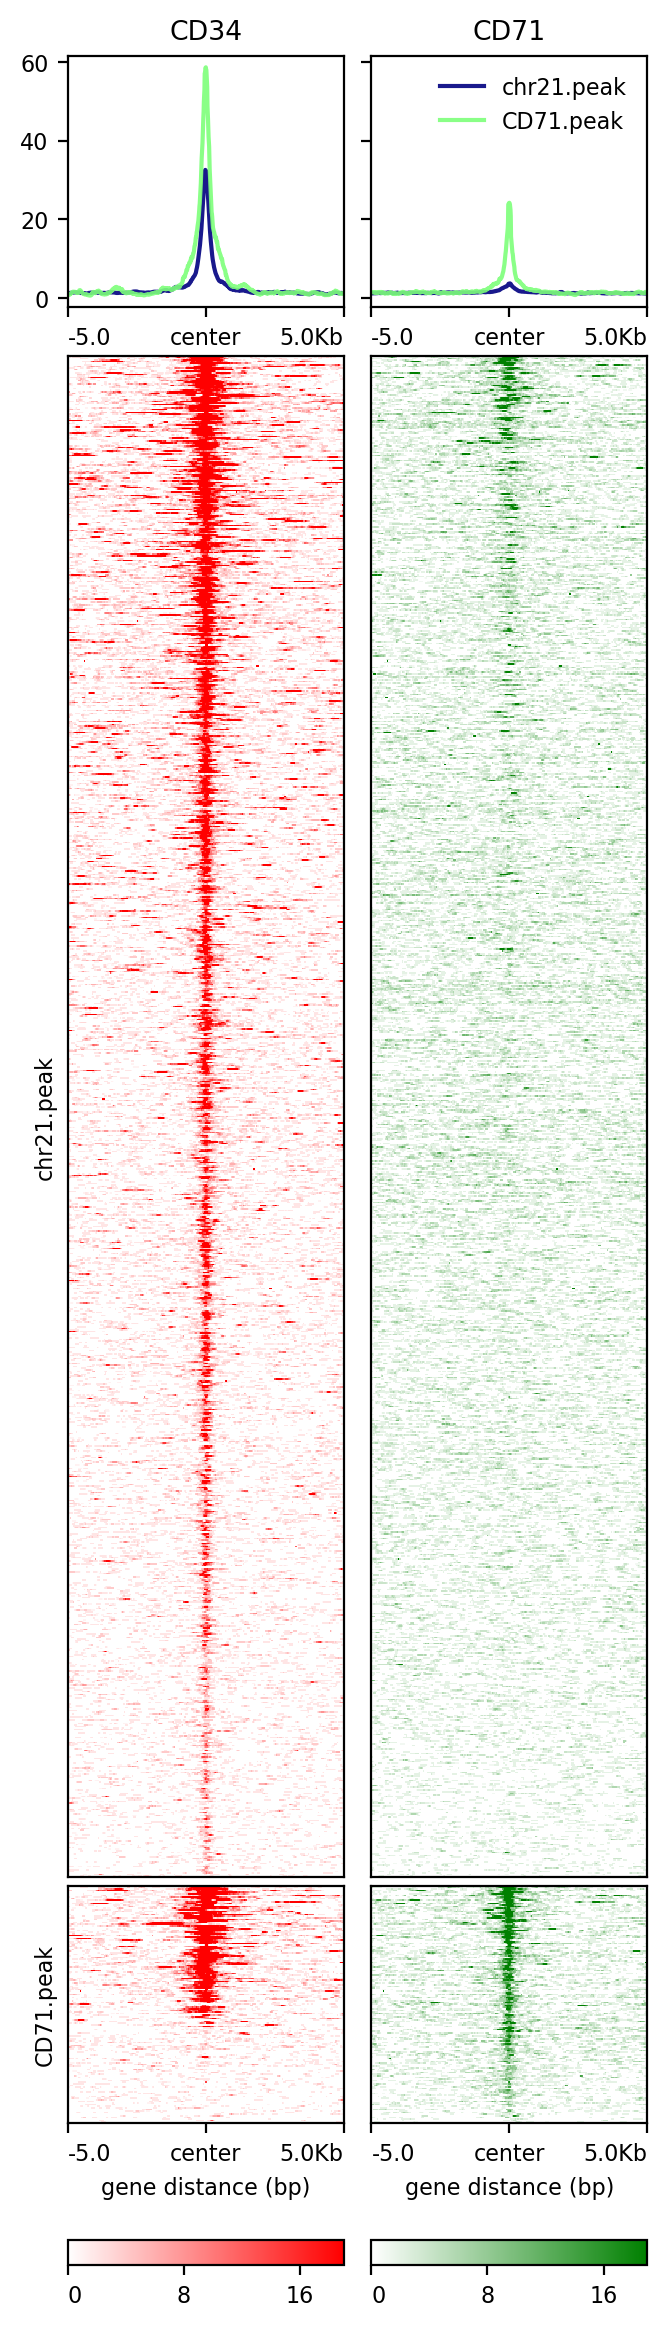

In [104]:
!plotHeatmap -m test2.gz -out test2.png --colorList white,red white,green
Image("test2.png")

In [105]:
!computeMatrix scale-regions \
-a 5000 -b 5000 -m 5000 \
-R hg19.chr21.gene.bed \
-S CD34.bw CD71.bw \
--skipZeros \
-p 20 \
-o test3.gz

Skipping ENSG00000269011, due to being absent in the computeMatrix output.
Skipping ENSG00000227874, due to being absent in the computeMatrix output.
Skipping ENSG00000214319, due to being absent in the computeMatrix output.
Skipping ENSG00000232797, due to being absent in the computeMatrix output.


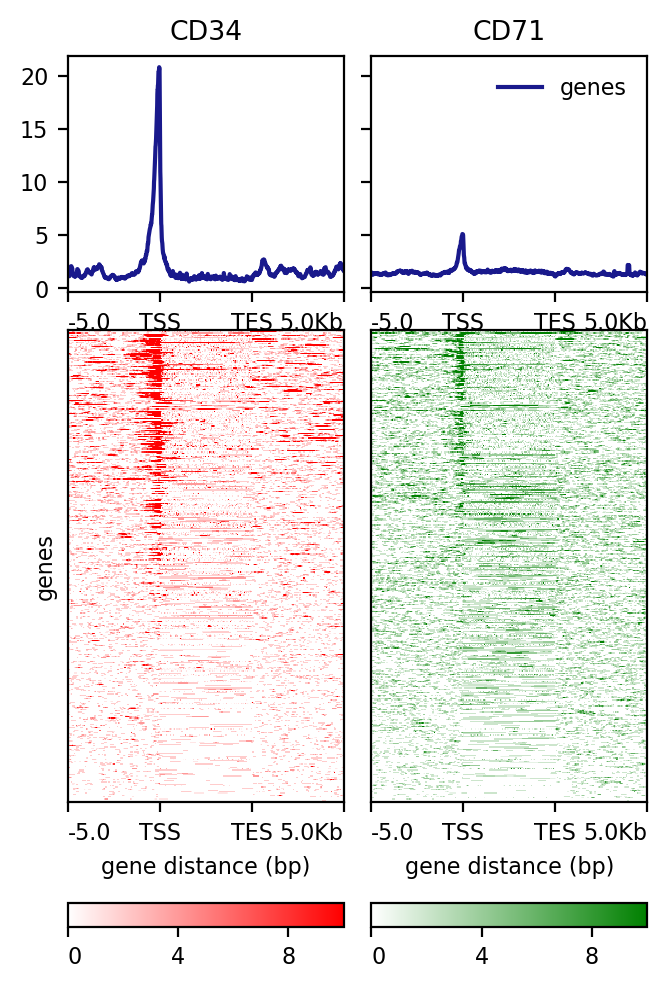

In [109]:
!plotHeatmap -m test3.gz -out test3.png \
--colorList white,red white,green \
--heatmapHeight 8
Image("test3.png")

### signal plot summary
1. two-steps, first to computeMatrix (two modes), then plotHeatmap
2. plotHeatmap can't control line plot color. To do so, use plotProfile, but it can't plot the heatmap.
3. when making footprint plot, use binSize of 1bp or 2bp
4. default plot is per bed file, use `--perGroup` to change it per bw file
